## Шаг 3: Структуризация текста с помощью RuBERT и предварительное разбиение

### Цель:
Структурировать данные, полученные на предыдущем этапе с помощью ИИ, с помощью разделения текста на более короткие фрагменты и последующего zero-shot classification.

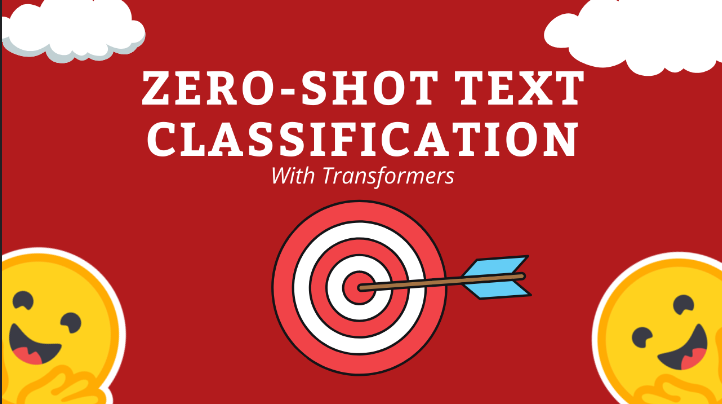
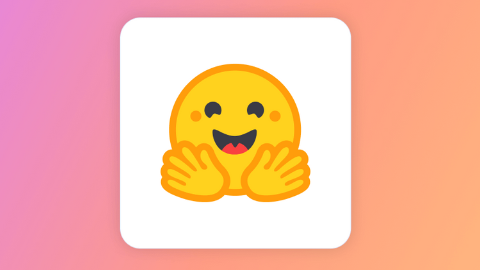
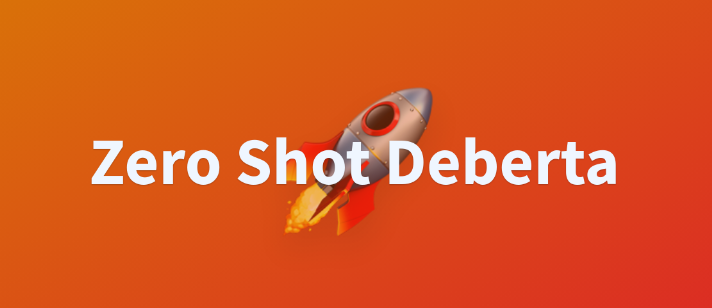

### Описание:

В данном задании вам предстоит разбивать текст на отдельные сегменты и классифицировать их с помощью предобученной модели **RuBERT**.

Для чего это надо:
* у нас данные получены плохо структурированные (они хоть и разбиты на абзацы, но смысл их не ясен).
* классификация улучшит ориентировку модели по фрагментам в векторной базе.
* дополнительное разбиение на части текста позволяет небольшим моделям "лучше уловить суть", а следовательно, в будущем искать точнее релевантные чанки.



### **BERT** и **RuBERT**: **Теория и примеры применения**: Сравнение и особенности

**BERT (Bidirectional Encoder Representations from Transformers)** — это мощная модель для обработки естественного языка, разработанная Google. Она использует архитектуру трансформеров, которая позволяет эффективно учитывать контекст слов как слева, так и справа от целевого слова (это отличие от традиционных моделей, которые читают текст слева направо или справа налево). Это делает BERT особенно эффективным для задач, где важно понимать значение слова в контексте всего предложения.

**BERT** обучается на огромном количестве текстов и может быть дообучен (fine-tuned) под специфические задачи, такие как классификация текста, Named Entity Recognition (NER), вопрос-ответ и другие.

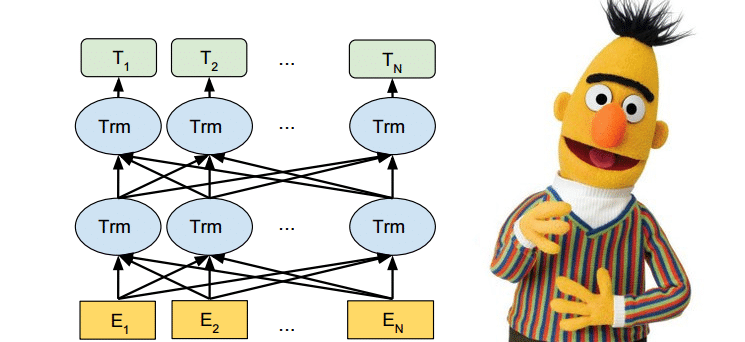

### Основные особенности BERT:
1. **Bi-directional Contextualization**:
   BERT использует двустороннее внимание, что означает, что модель учитывает контекст как слева, так и справа от каждого токена, чтобы понять его значение. Это отличает BERT от многих предыдущих моделей, которые использовали однонаправленное внимание.

2. **Masked Language Modeling (MLM)**:
   В BERT используется техника маскированного моделирования, при которой случайные токены в тексте маскируются, и модель пытается предсказать эти токены, используя контекст, представленный другими словами.

3. **Next Sentence Prediction (NSP)**:
   Помимо задачи MLM, BERT также обучается на задаче предсказания следующего предложения, что помогает ему понимать отношения между предложениями в тексте.

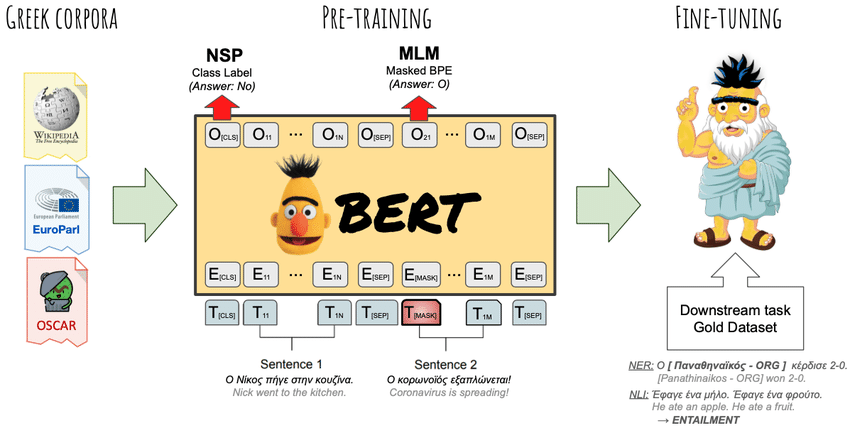

**RuBERT** - это версия **BERT**, адаптированная для русского языка. **RuBERT** обучен на огромных корпусах русского текста и учитывает все особенности синтаксиса и лексики русского языка. Он позволяет эффективно решать задачи обработки текстов на русском языке, такие как анализ настроений, извлечение сущностей, классификация текстов и другие.

#### Zero-shot классификация с использованием RuBERT

**Zero-shot классификация** - это метод, при котором модель классифицирует текст, не обучаясь специально на примерах той или иной категории. В модели **BERT** или **RuBERT** можно использовать подходы, такие как необученная классификация на основе семантических связей между текстом и метками, которые она уже "понимает".

Причины, почему для **zero-shot классификации** на русском языке лучше всего использовать **RuBERT**:

* Понимание контекста русского языка: **RuBERT** специально обучен на текстах на русском языке и поэтому способен учитывать грамматические и лексические особенности русского языка, которые могут сильно отличаться от других языков. Например, модели на других языках могут не учитывать определенные нюансы и конструкции, характерные для русского языка.

* Обучение на большом корпусе русского текста: **RuBERT** был обучен на огромных объемах текста, что позволяет ему хорошо понимать семантику и тонкие различия между словами, а также правильно работать с русскими словами и выражениями, которые могут иметь несколько значений в зависимости от контекста.

* Семантические представления: В zero-shot классификации важно, чтобы модель могла сопоставлять текст с метками категорий на основе семантического сходства. **RuBERT** генерирует эмбеддинги (векторные представления) текста и меток, которые позволяют эффективно сравнивать их и классифицировать текст в нужную категорию. Важно, что **RuBERT**, благодаря своей обученной архитектуре, может напрямую классифицировать текст, даже если он не был обучен на примерах этих меток.

* Совместимость с методами **zero-shot классификации**: **RuBERT** может быть использован в комбинации с различными подходами для **zero-shot классификации**, например, с методами, основанными на генерации эмбеддингов текста и меток, или с использованием подхода классификации, основанного на текстах запросов (например, "похож на вопрос о регистрации" для определения категории вопросов).

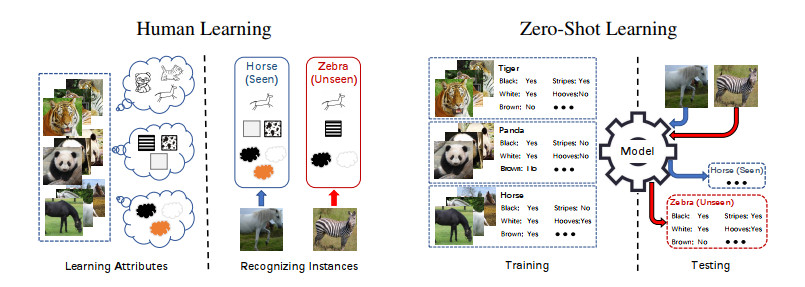
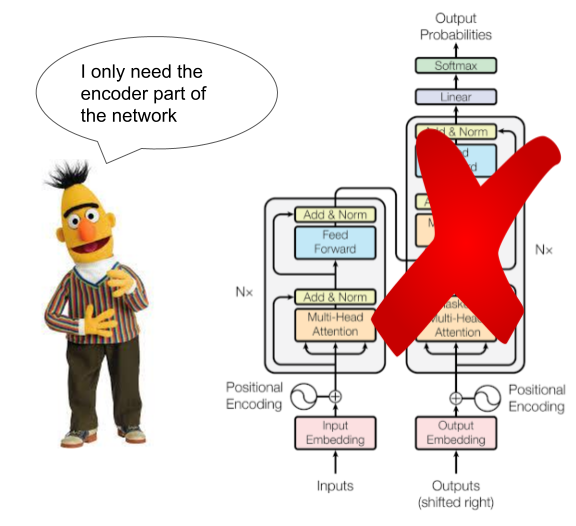
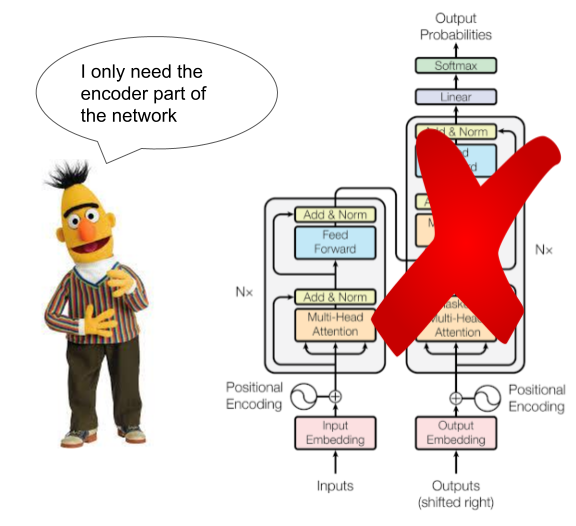
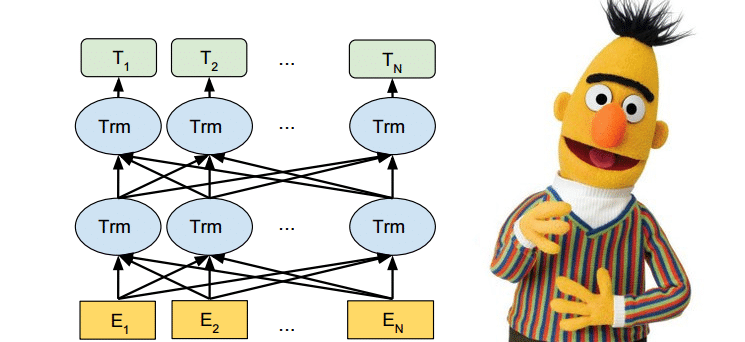
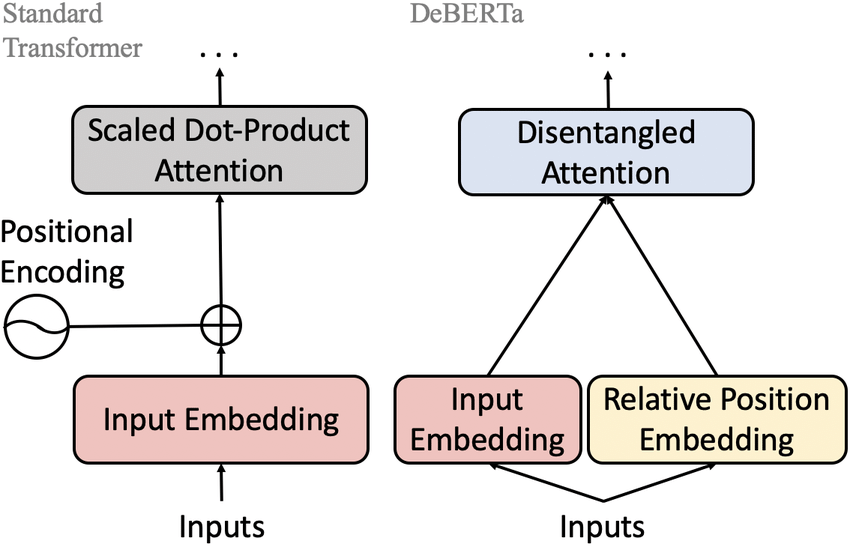
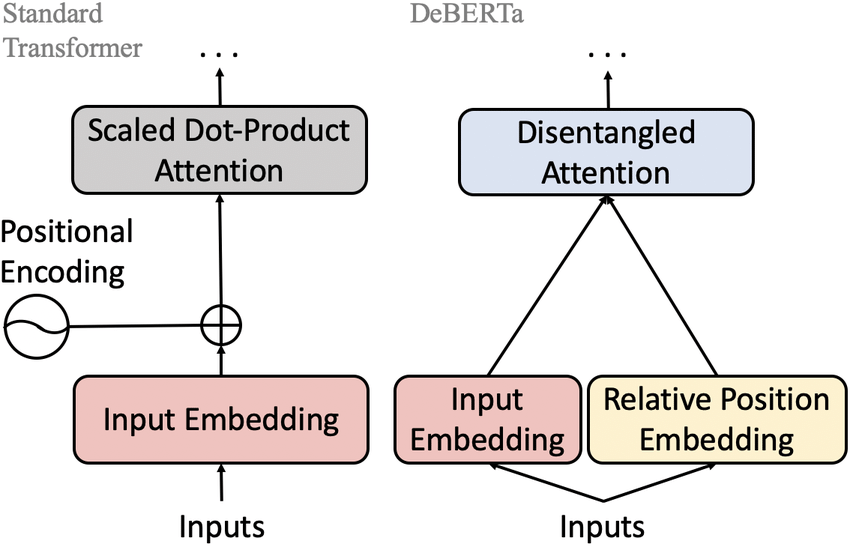
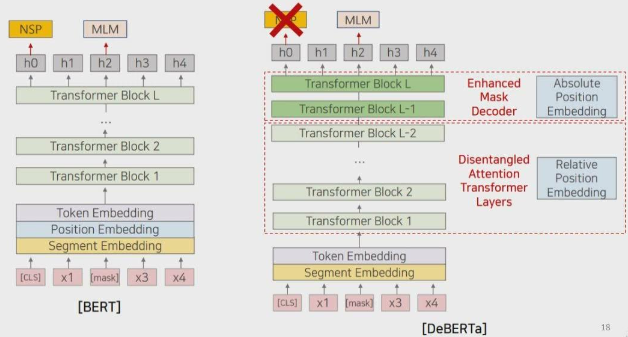
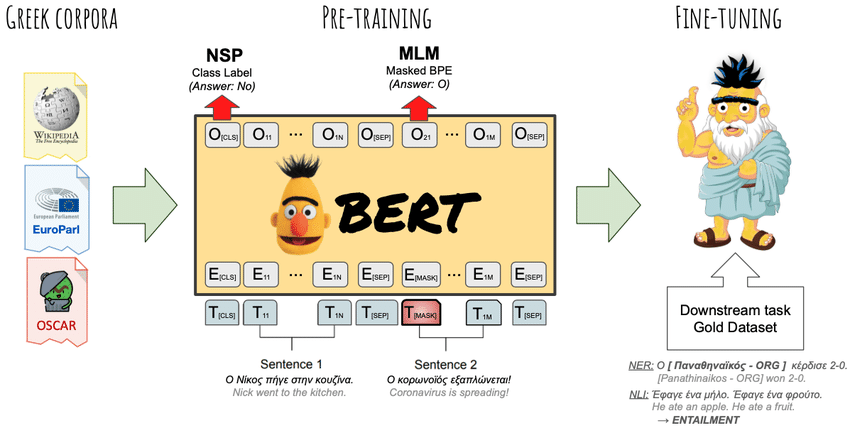
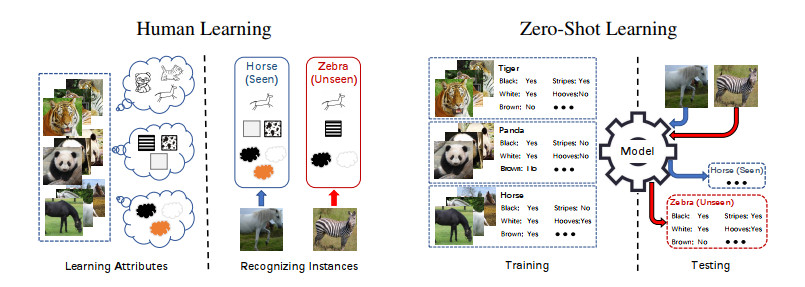

### Почему лучше сначала разделить, а потом классифицировать

По нескольким причинам:

* Размер модели: Модели, такие как те, которые мы используем, имеют ограничения по размеру входных данных (примечание - модели небольшого размера подбирались, чтобы иметь возможность построить RAG-систему на CPU). Большие тексты могут не помещаться в модель или приводить к потерям информации, если их просто усреднять. Разделение на фрагменты позволяет работать с текстами, которые соответствуют ограничениям модели.

* Улучшение точности классификации: Когда текст разделяется на логические части (например, абзацы или предложения), каждый фрагмент становится более концентрированным и специфичным для определенной темы. Это повышает точность классификации, так как модель фокусируется на меньшем контексте и может лучше понять содержание.

* Контекст в векторной базе: Чанки (структурированная информация в векторной базе), закрепленные за определенным курсом в векторной базе, позволяют эффективно искать и извлекать релевантные фрагменты. Это также облегчает связь между частью текста и курсом, к которому они принадлежат, что полезно для дальнейшей обработки и поиска.

* Снижение шума и увеличение вариативности: В больших текстах часто встречается много нерелевантной информации. Разделение на "кусочки" позволяет снизить "шум" в классификации, так как модель будет работать с более релевантным контекстом и точнее выделять категории для каждого конкретного фрагмента.

Таким образом, разделение текста на фрагменты повышает как точность классификации, так и удобство дальнейшей обработки данных, обеспечивая большую гибкость и масштабируемость системы.

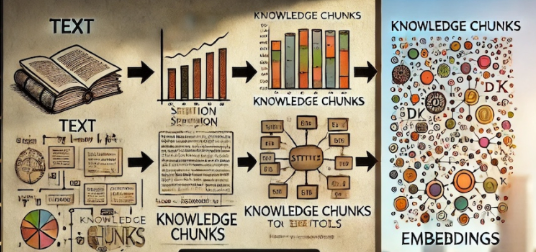

### Задание 1 - Разделение текста:

Построить код для разделения длинных текстов (в большинстве случаев, если у нас мало данных и мы не знаем, о чём текст, можно разбить тексты на 1500 символов, если у нас текст имеет меньше 2000 символов)

* Нужно написать функцию **split_text()**, которая разделит текст на части по 1500 символов, если текст превышает число символов 2000. Не забывайте, что текст не должен прерываться на полуслове, а только на точке после слова и перед пробелом (неправильные примеры разделение: ["... дополнитель", "ных источниках. Приступайте..."] и [... работают в Яндекс.", "Диске и прочих..."])

### Задание 2 - Классификация текста:

Классификация текста с использованием **DeBERTa**:

* Изучите, как работает модель **RuBERT** (`cointegrated/rubert-base-cased-nli-threeway`) для классификации текста. Для этого воспользуйтесь доступной моделью из библиотеки **Transformers**.
Для классификации вам нужно будет использовать модель, обученную на задаче классификации, и адаптировать её под ваши нужды (например, классификация по фрагментам текста, извлечённым из документа).
* Разбейте текст на фрагменты функцией `split_text()`, созданной выше, и классифицируйте функцией `classify_info()` (один текст классифицируйте с помощью функции `classify_sequence()`) все фрагменты с сохранением в коллекцию (внимание: на CPU классификация всех сегментов после разделения может занимать около 30 минут, поэтому если не хотите ждать, то по возможности переходите на GPU).
* **Важно:** не меняется классы в переменной `candidate_labels`, автоматической системой будет проверяться правильность расставленных категорий информации.

**Итого**. У вас должно получиться три функции: `split_text()`, `classify_sequence()` и `classify_info()`.

---

### Что проверяется:
- Инициализировать модель классификации с помощью библиотеки `transformers` несложно, поэтому проверять будет равильность работы только функции `split_text()`.

### Как сдавать задание:

- Заранее определить импорты нужных библиотек (например, для аннотаций)
- Загрузить скрипты с функцией `split_text()`.
- Убедитесь, что не трогали переменную `candidate_labels` в шаблоне задания.

## Практическая часть

## Задание 1 - Разделение текста

### Решение студента

In [ ]:
from typing import List, Dict


def split_text(text: str, piece_size: int = 1500, min_length: int = 2000) -> List[str]:
    """
    Разбивает длинный текст на меньшие части, каждая из которых не превышает заданный размер. 
    Если текст короче минимальной длины, возвращает его целиком.

    Параметры:
    - text (str): Исходный текст, который необходимо разделить на фрагменты.
    - piece_size (int): Максимальная длина каждого фрагмента (по умолчанию 1500 символов).
    - min_length (int): Минимальная длина текста, при которой он не будет разделен на фрагменты (по умолчанию 2000 символов).

    Возвращаемое значение:
    - List[str]: Список частей текста. Каждая часть — это строка текста длиной не более `piece_size` символов.
    
    Пример:
    >>> split_text("Это длинный текст. Его нужно разбить на части", chunk_size=15, min_length=20)
    ["Это длинный текст.", "Его нужно разбить на части"]
    """
    ...
    return text_pieces

### Эталонное решение

In [ ]:
from typing import List, Dict


def split_text(text: str, piece_size: int = 1500, min_length: int = 2000) -> List[str]:
    """
    Разбивает длинный текст на меньшие части, каждая из которых не превышает заданный размер. 
    Если текст короче минимальной длины, возвращает его целиком.

    Параметры:
    - text (str): Исходный текст, который необходимо разделить на фрагменты.
    - piece_size (int): Максимальная длина каждого фрагмента (по умолчанию 1500 символов).
    - min_length (int): Минимальная длина текста, при которой он не будет разделен на фрагменты (по умолчанию 2000 символов).

    Возвращаемое значение:
    - List[str]: Список частей текста. Каждая часть — это строка текста длиной не более `piece_size` символов.
    """
    if len(text) <= min_length:
        return [text]

    text_pieces = []
    current_piece = ""

    sentences = re.split(r'(?<=\.) ', text)

    for sentence in sentences:
        if len(current_piece) + len(sentence) + 1 <= piece_size:
            current_piece += sentence + " "
        else:
            text_pieces.append(current_piece.strip())
            current_piece = sentence + " "

    if current_chunk:
        text_pieces.append(current_piece.strip())

    return text_pieces

## Задание 2 - Классификация текста

### Решение студента

In [ ]:
from transformers import pipeline, logging
logging.set_verbosity_error()


def classify_sequence(text: str) -> Tuple[List[str], List[float]]:
    """
    Классифицирует входной текст с использованием модели zero-shot классификации для назначения меток.
    
    Функция использует модель `cointegrated/rubert-base-cased-nli-threeway` для классификации текста по заданному списку категорий (меток).
    Возвращает список категорий и их соответствующие вероятности для заданного текста.
    
    Параметры:
    - text (str): Входной текст, который нужно классифицировать. Это может быть описание курса, вопрос или любой другой текст.
    
    Возвращаемое значение:
    - Tuple[List[str], List[float]]: Кортеж, где первый элемент — список меток, присвоенных тексту, а второй — список вероятностей для каждой метки (мульти-лейбл классификация).
    
    Пример:
    >>> text = "Этот курс обучает основам Python для начинающих."
    >>> labels, scores = classify_sequence(text)
    >>> print(labels)
    ["Практика и советы", "Уровень сложности", "Стоимость и оплата"]
    >>> print(scores)
    [0.98, 0.92, 0.91]
    """
    classifier = ...

    candidate_labels = [
    "Общее описание курса",
    "Практика и проекты",
    "Содержание курса",
    "Уровень сложности",
    "Преподаватели и эксперты",
    "Карьера и трудоустройство",
    "Материалы курса",
    "Целевая аудитория",
    "Стоимость и оплата",
    "Гарантии и возврат средств",
    "Отзывы учащихся о курсе"
]
    
    output = classifier(..., multi_label=True)
    return (output['labels'], output['scores'])


def classify_info(info_collection: Dict[str, List[str]]) -> Dict[str, List[Dict[str, List[str]]]]:
"""
    Классифицирует текстовую информацию для каждого курса, деля длинные тексты на части и классифицируя их с использованием модели.
    
    Функция обрабатывает коллекцию текстов, классифицирует каждый текст (или его часть, если текст слишком длинный) 
    и сохраняет результат в структуру данных, где каждый URL будет связан с классифицированными частями текста.

    Параметры:
    - info_collection (Dict[str, List[str]]): Словарь, где ключом является URL курса, а значением — список текстов (или описаний), которые нужно классифицировать.
    
    Возвращаемое значение:
    - Dict[str, List[Dict[str, List[str]]]]: Возвращает словарь, где ключами являются URL курса, а значениями — списки словарей, 
      каждый из которых содержит текст (или его часть) и список категорий, присвоенных этому тексту.

    Пример:
    >>> info_collection = {"https://course1.com": ["Описание курса 1", "Другие данные..."]}
    >>> classified_info = classify_info(info_collection)
    >>> print(classified_info)
    {
        "https://course1.com": [
            {"sequence": "Описание курса 1", "categories": ["изучаемые темы", "требования к участникам", "стоимость и оплата"]},
            {"sequence": "Другие данные...", "categories": ["содержание курса", "преподаватели"]}
        ]
    }
    """
    courses_information_classified = dict()
    ...
    return info_collection_classified

### Эталонное решение

In [ ]:
from tqdm.notebook import tqdm
from transformers import pipeline


def classify_sequence(text: str) -> Tuple[List[str], List[float]]:
    """
    Классифицирует входной текст с использованием модели zero-shot классификации для назначения меток.
    
    Функция использует модель `cointegrated/rubert-base-cased-nli-threeway` для классификации текста по заданному списку категорий (меток).
    Возвращает список категорий и их соответствующие вероятности для заданного текста.
    
    Параметры:
    - text (str): Входной текст, который нужно классифицировать. Это может быть описание курса, вопрос или любой другой текст.
    
    Возвращаемое значение:
    - Tuple[List[str], List[float]]: Кортеж, где первый элемент — список меток, присвоенных тексту, а второй — список вероятностей для каждой метки.
    """
    
    classifier = pipeline(
        "zero-shot-classification", 
        model="cointegrated/rubert-base-cased-nli-threeway",
        device=(0, -1)[device == 'cpu']
    )
    
    candidate_labels = [
    "Общее описание курса",
    "Практика и проекты",
    "Содержание курса",
    "Уровень сложности",
    "Преподаватели и эксперты",
    "Карьера и трудоустройство",
    "Материалы курса",
    "Целевая аудитория",
    "Стоимость и оплата",
    "Гарантии и возврат средств",
    "Отзывы учащихся о курсе"
]
    
    output = classifier(text, candidate_labels, multi_label=True)
    result = []

    for category, score in zip(output['labels'], output['scores']):
        if score > 0.8:
            result.append(category)
            
    # если нет отсеянных категорий
    if not result:
        result = ['Прочая информация']
        
    return result
    

def classify_info(info_collection: Dict[str, List[str]]) -> Dict[str, List[Dict[str, List[str]]]]:
    """
    Классифицирует текстовую информацию для каждого курса, деля длинные тексты на части и классифицируя их с использованием модели.
    
    Функция обрабатывает коллекцию текстов, классифицирует каждый текст (или его часть, если текст слишком длинный) 
    и сохраняет результат в структуру данных, где каждый URL будет связан с классифицированными частями текста.

    Параметры:
    - info_collection (Dict[str, List[str]]): Словарь, где ключом является URL курса, а значением — список текстов (или описаний), которые нужно классифицировать.
    
    Возвращаемое значение:
    - Dict[str, List[Dict[str, List[str]]]]: Возвращает словарь, где ключами являются URL курса, а значениями — списки словарей, 
      каждый из которых содержит текст (или его часть) и список категорий, присвоенных этому тексту.
    """
    info_collection_classified = dict()
    
    # Определяем общее количество сегментов для tqdm
    total_sequences = sum(len(texts) for texts in info_collection.values())
    
    with tqdm(total=total_sequences, desc="Классификация текстов") as pbar:
        for url, sequences in info_collection.items():
            for seq in sequences:
                pieces = split_text(seq) if len(seq) > 2000 else [seq]
                
                for piece in pieces:
                    seq_categories = ', '.join(classify_sequence(piece))
                    classified_piece = {
                        'sequence': piece,
                        'categories': seq_categories
                    }
                    info_collection_classified.setdefault(url, []).append(classified_piece)
                pbar.update(1)
    
            pbar.set_description(f"Обработан URL: {url.split('/')[-1]}")
            
    return info_collection_classified